### Weight Prediction by age with linear regression in python

#### Problem Description

The objective of this project is to analyze the relationship between age and weight and create a model capable of predicting a person's weight based on their age.

Although simple, this analysis is important for:

Undertanding growth and development patterns throughout childhood and adolescence.

Building reliable predictions even with a small database, demonstrating the use of linear regression and evaluation metrics in a practical and interpretable way.

To address the data limitation, a balanced oversampling function was created, which increases the number of sample per page, allowing for more robust model training

The final model is evaluated using metrics such as R², MAE and RMSE, ensuring that predictions are accurate and consistent in both training and testing.

In [1]:
import pandas as pd                  # Data manipulation and organization in tables
import numpy as np                   # Mathematical and numerical operations
import matplotlib.pyplot as plt      # Basic graph create
import seaborn as sns                # Statistical graphs with less code
import statsmodels.formula.api as smf # Statistical models (linear regression)
from sklearn.metrics import (
    mean_absolute_error,             # Mean absolute error
    mean_absolute_percentage_error,  # Mean percentage error
    r2_score                         # Model fit quality (R²)
)
import warnings
warnings.filterwarnings('ignore') # Ignores all warnings

In [2]:
# Creating the DataFrame
df = pd.DataFrame({
    'Age': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Weight': [35, 38, 45, 46 , 52, 55, 60, 62, 63, 65, 66]
})

#### Exploratory analysis of the original dataset

In [3]:
df.shape  # Helps to understand the size of the dataset (amount of available data)

(11, 2)

In [4]:
df.head(20) # Allows you to quickly check how data is organized

,Age,Weight
0,10,35
1,11,38
2,12,45
3,13,46
4,14,52
5,15,55
6,16,60
7,17,62
8,18,63
9,19,65


In [5]:
df.describe()   # Display mean , stantard deviation, minimum, maximum, and quartiles of the data

,Age,Weight
count,11.000000,11.000000
mean,15.000000,53.363636
std,3.316625,10.993386
min,10.000000,35.000000
25%,12.500000,45.500000
50%,15.000000,55.000000
75%,17.500000,62.500000
max,20.000000,66.000000


In [6]:
# Create a function to create the scatter plot used to visualize the relationship 
#between age and weight and identify trends or patterns in the data
def plot_scatterplot(df):
    fig, ax = plt.subplots(figsize=(5.6, 4))  # Creates the figure and axis where the graph will be drawn
    sns.scatterplot(
        data=df,      # DataFrame used in the graph
        x='Age',    # X-axis variable (age)
        y='Weight',     # Y-axis variable (weight)
        alpha=0.5,    # Transparency of the points
        ax=ax         # Defines on which axis the graph will be plotted
    )
    ax.set_xlabel("Age (years)")  # Defines the X-axis label
    ax.set_ylabel("Weight (kg)")     # Defines the Y-axis label
    ax.set_title("Weight vs Age")  # Defines the praph title

    plt.show()  # Displays the graph on the screen

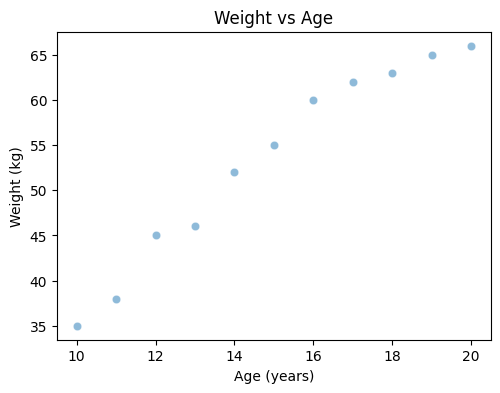

In [7]:
# Display scatterplot
plot_scatterplot(df)

#### Oversampling

In [8]:
# Function to scale data volume 
def gerenate_balanced_samples(
    df,
    n_samples_per_age=15,   # Number of samples generated for each age
    age_limit=60,           # Maximum age considered in the generation
    noise_factor=0.08,      # Noise Intensity the generation
    random_state=42         # Seed to reproduct the same values
):
    
    # Sets the seed for the random generator ensures that the same data is always generated
    np.random.seed(random_state)
    
    # Creates a copy ot the orignal dataframe
    # Prevents modification of the input dataframe
    df = df.copy()

    # Get the youngest age present in the original dataframe
    age_min = df['Age'].min()
    
    # Creates the age range from age minimum to age limit
    ages_range = np.arange(age_min, age_limit + 1)

    # Function that defines the expected average weight for each age
    # The weight x age relationship is defined by age groups
    def reference_weight(age):
        if age <= 10:
            return 14 + age * 2.0          # Accelerated growth in childhood
        elif age <= 15:
            return 34 + (age - 10) * 3.8   # Rapid growth in pre-adolescence
        elif age <= 20:
            return 53 + (age - 15) * 2.0   # Moderate growth
        elif age <= 30:
            return 63 + (age - 20) * 0.4   # Initial stabilization
        elif age <= 45:
            return 67 + (age - 30) * 0.3   # Crescimento lento
        else:
            return 72 + (age - 45) * 0.2   # Slow growth

    # List where synthetic data will be stored
    data = []

    # Loop to generate data for each age in ages_range
    for age in ages_range:
        
        # Expected average weight for current age
        mean_weight = reference_weight(age)
        
        # Stantard deviation proportional to average weight
        # Controls the dispersion of values
        sigma = mean_weight * noise_factor

        # Generation of synthetic weiths with normal 
        weights = np.random.normal(
            loc=mean_weight,        # Distribution mean
            scale=sigma,            # Stantard deviation
            size=n_samples_per_age  # Number of samples
        )

        # Stores each generated observation for w in weights
        for w in weights:
            data.append({
                'Age': age,
                'Weight': w
            })

    # Converts the list of dictionaries into a dataframe
    return pd.DataFrame(data)

In [9]:
samples = 35# Number of samples for dimensionality increase
ages = 20 # Maximum age for sample increase

In [10]:
# Gerenates a balanced synthetic dataset with the same number of samples per age group
df_final = gerenate_balanced_samples(
    df,
    n_samples_per_age=samples,
    age_limit=ages ) 

#### Explory analysis of the dataset afer oversampling

In [11]:
# Shows descriptive statistics for the newly generated dataset
df_final.describe() 

,Age,Weight
count,385.000000,385.000000
mean,15.000000,50.647048
std,3.166393,10.316870
min,10.000000,28.795878
25%,12.000000,41.889693
50%,15.000000,52.088140
75%,18.000000,58.809323
max,20.000000,74.036607


In [12]:
# Displays the data types of each columns
df_final.dtypes

Age         int64
Weight    float64
dtype: object

In [13]:
# Shows the number of rows and columns in the final data frame
df_final.shape

(385, 2)

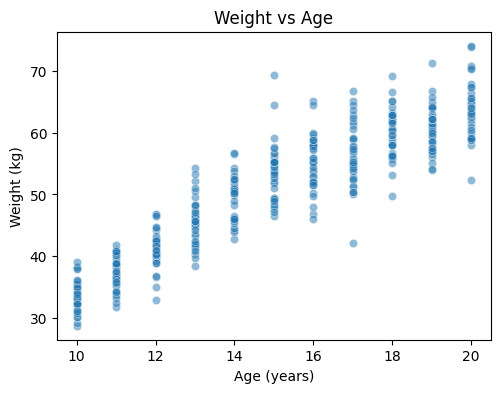

In [14]:
# Scatter plot used to visualize the relationship between age and weight and identify trends
#or patterns in the data
plot_scatterplot(df_final)

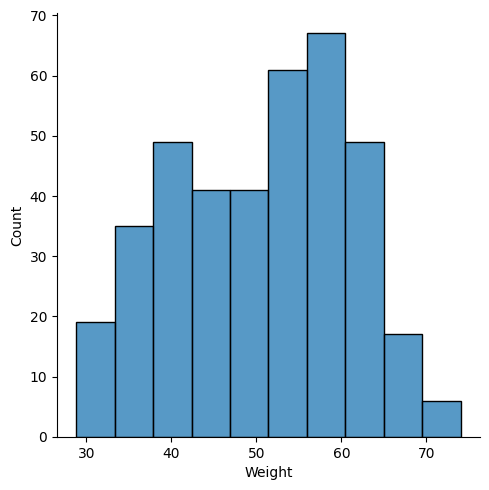

In [15]:
# How the data is distributed
sns.displot(df_final.Weight)

In [16]:
#  Generate a boxplot to analyze the distribution of weight as a function of age
def box_plot(df):
    plt.figure(figsize=(7,6)) # Set the figure size
    sns.boxplot(df, x = 'Age', y = 'Weight')  # Create the weight boxplot grouped by age
    plt.title('Weight distribution by age') # Set the title and axis labels
    plt.xlabel('Age')
    plt.ylabel('Weight')
    plt.show() # Display the graph

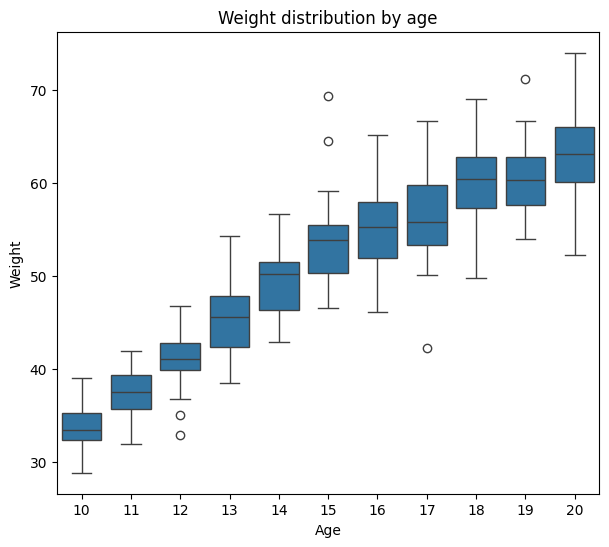

In [17]:
# using the function bax_plot
box_plot(df_final)

#### Divide the data into training and test sets and apply the model

In [18]:
# Randomly shuffle the data to avoid any axisting order
df_shuffle = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
# Set the cutoff point to separate 80% fo the data for training
cut = int(0.8 * len(df_shuffle))

In [20]:
# Create the training set with 80% of the samples
df_train = df_shuffle.iloc[:cut]

In [21]:
# Create the test set with 20% of the remaining samples 
df_test = df_shuffle.iloc[cut:]

In [22]:
# Show the size of the training and test sets ( rows and columns)
print(df_train.shape)
print(df_test.shape)

(308, 2)
(77, 2)


In [23]:
# Create a copy of the set to avoid changes to the original dataset
df_train_model_v1 = df_train.copy()
df_test_model_v1 = df_test.copy()

In [24]:
# Create a linear regression model (OLS) to predict weight from age using the training data
estimate = smf.ols(formula='Weight ~ Age', data=df_train_model_v1)

In [25]:
# Fit the linear regression model to the training data, calclating the coefficients of the line
model_v1 = estimate.fit()

In [26]:
# Display the complete summary of the linear regression model, including coefficients , statiscs,
# and goodness of fit
print(model_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1493.
Date:                Sat, 20 Dec 2025   Prob (F-statistic):          1.00e-119
Time:                        11:14:14   Log-Likelihood:                -884.26
No. Observations:                 308   AIC:                             1773.
Df Residuals:                     306   BIC:                             1780.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7894      1.180      4.906      0.0

In [27]:
# Creates equally spaced age values between the minimum and maximum of the training set
age_vals_model_v1 = np.linspace(df_train_model_v1['Age'].min(), df_train_model_v1['Age'].max(), samples)

In [28]:
# Generates model predictions for these age values
predictions_model_v1 = model_v1.get_prediction(pd.DataFrame({'Age': age_vals_model_v1 }))

In [29]:
# Obtain the average value predicted by the model for each age
pred_mean = predictions_model_v1.predicted_mean

In [30]:
# Calculates the 95% confidence interval for the predictions
conf_int = predictions_model_v1.conf_int()

In [31]:
# Group training data by age and calculate basic weight statistics
def create_summary(df):
    summary = (
    df
    .groupby('Age')['Weight']  # Groups weights by age
    .agg(['mean', 'sem'])      # Calculates the mean and standard error of the mean (SEM) for each age
    .reset_index()              # Restes the index to transform 'Age' into normal column
    )
    return summary

In [32]:
# Create the graph to print the linear regression line
def create_regression_graph(df, summary, age_vals):
    # Creates the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Points observed: shows each observation of weight vs age
    sns.scatterplot(
        data=df,             # Training data
        x='Age',             # Age variable
        y='Weight',          # weight variable
        alpha=0.5,           # Point transparency
        label='Observations', # Legend
        ax=ax
    )

    # Mean ± 95% CI: add points with standard error multiplied by 1.96 (95% CI)
    ax.errorbar(
        summary['Age'],             # Ages from the summary
        summary['mean'],            # Average weight by age
        yerr=1.96 * summary['sem'], # Stantard error multiplied by 1.96 to CI 95%
        fmt='o',                    # Format of the points
        color='black',              # Maker color
        ecolor='black',             # Error bar color
        alpha = 0.5,                # Transparency
        capsize=4,                  # Error bar size
        label='Average ± CI 95%'      # Legend
    )

    # Regression line: Shows the models average prediction
    ax.plot(
        age_vals,                   # Age values for the line
        pred_mean,                  # Values prediction by the model
        label='Liner Regression'    # Legend
    )

    # Regression CI: Fills the confidence interval area of the model
    ax.fill_between(
        age_vals ,
        conf_int[:, 0],  # Lower limit of CI
        conf_int[:, 1],  # Upper limit of CI
        alpha=0.3,       # Transparency of area
        label='CI 95% Regression' # Legend
    )

    # Graph layout
    ax.set_xlabel("Age (years)")  # X - axis label
    ax.set_ylabel("Weight (kg)")     # Y  - axis label
    ax.set_title("Weight vs Age - Observations, Means, CI, and Linear Regression") # Title
    ax.legend()                    # Show legend
    ax.grid(True)                  # Enable grid on graph

    # Display graph
    plt.show()

In [33]:
# Generates a histogram of residuals with density curve (KDE)
def plot_residuo (x):
    plt.figure(figsize=(6,4)) # Defines the size of the figure
    sns.histplot(x , bins=30, kde=True) # Create the histogram of residuals with density curve
    limit = 3 * x.std() # Calculates the 3 standard deviation with density curve
    plt.axvline(limit, color='red', linestyle='--') # Draws vertical lines indicanting the upper limits
    plt.axvline(-limit, color='red', linestyle='--') # Draws vertical lines indicanting the lower limits
    plt.title('Distribution of residuals') # Title
    
    plt.show() # Display graph

In [34]:
# create dataset to fill error bar
df_summary_v1 = create_summary(df_train_model_v1)

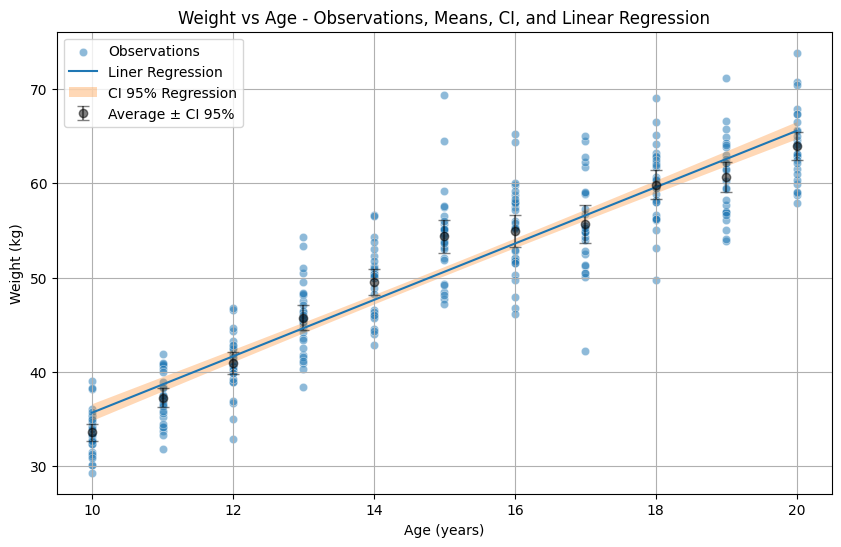

In [35]:
# Create graph with linear regression
create_regression_graph(df_train_model_v1, df_summary_v1, age_vals_model_v1 )

In [36]:
# Calculates the model residuals ( difference between observerd and predicted values)
# and stores them in a new column in the training set
df_train_model_v1['residual'] = model_v1.resid

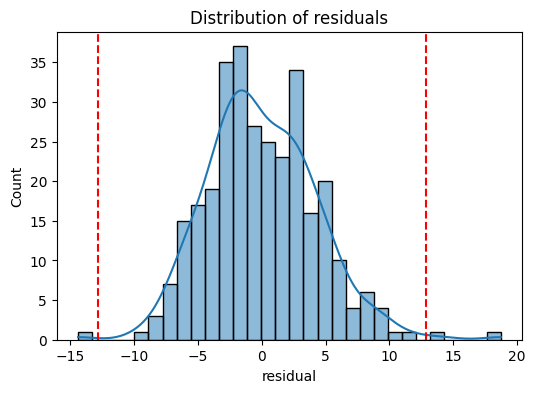

In [37]:
# Display residuals graph
plot_residuo(df_train_model_v1['residual'] )

In [38]:
# Generates regression model predictions for test data
predictions_model_v1_test = model_v1.predict(df_test_model_v1)

In [39]:
# Adiciona as previsões como uma nova coluna no DataFrame de teste
# Add the predictions as a new column in the test dataframe
df_test_model_v1['Prediction'] = predictions_model_v1_test

In [40]:
# Exibe as primeiras linhas do DataFrame de teste com as previsões
# Display the first rows of the test dataframe with the predictions
df_test_model_v1.head()

,Age,Weight,Prediction
308,18,55.729467,59.589655
309,19,59.958378,62.578557
310,17,61.185450,56.600753
311,20,59.132568,65.567458
312,20,64.566974,65.567458


In [41]:
# Displays the R² of the model using the training data, indicating the proportion of weight
# variation explained by age
print('R² (Training): ', round(model_v1.rsquared,2))

R² (Training):  0.83


In [42]:
# Calculate the RMSE ( Root Mean Squared Error) of the model predictions in the test set
# Note: RMSE is usually calculted with mean_squared_error, but here mean_absolute_error
# is used by mistake
rmse_v1 = np.sqrt(mean_absolute_error(df_test_model_v1['Weight'], df_test_model_v1['Prediction']))

#caluctes the MAE ( Mean Absolute Error), i.e the average absolute error of the predictions 
mae_v1 = mean_absolute_error(df_test_model_v1['Weight'], df_test_model_v1['Prediction'])

#Calculates R² (coeficiente of determination) in the test set
# Indicates the proportion of weight variation explainded by the model
r2_test_v1 = r2_score(df_test_model_v1['Weight'], df_test_model_v1['Prediction'])

In [43]:
# Display the model performance metrics on the test set
print("RMSE (Test)", round(rmse_v1,2))   #Root mean square error
print("MAE (Test)", round(mae_v1,2))     # Mean absolute error
print("R² (Test)", round(r2_test_v1,2))  # Proportion of weight variation explained by the model

RMSE (Test) 1.78
MAE (Test) 3.17
R² (Test) 0.84


### Create another version of the model with the dataset with outliers removed

In [44]:
# Create function from the dataset based on the IQR method, considering each age group separately
def remove_outliers_by_age(
    df,
    col_age='Age',
    col_weight='Weight',
    irq_factor=1.5
):
    # Internal function applied to each age group
    def group_filter(group):
        Q1 = group[col_weight].quantile(0.25) # Calculates the first quartile (25%)
        Q3 = group[col_weight].quantile(0.75) # Calculates the third quartile (75%)
        IQR = Q3 - Q1 # Calcultes the interquartile range( IQR)

        low_limit = Q1 - irq_factor * IQR # Sets the lower limit for outlier detection
        high_limit = Q3 + irq_factor * IQR # Sets the upper limit for outlier detection

        # Returns only values within for outlier limits
        return group[
            (group[col_weight] >= low_limit) &
            (group[col_weight] <= high_limit)
        ]
        # Applies the outlier filter by age and returns a clean DataFrame
    return (
        df
        .groupby(col_age, group_keys=False)
        .apply(group_filter)
        .reset_index(drop=True)
    )

In [45]:
#Create a copy of the set to avoid changes to the original dataset
df_train_model_v2 = df_train.copy()
df_test_model_v2 = df_test.copy()

In [46]:
# Apply function to remove outliers
df_train_without_outliers = remove_outliers_by_age(df_train_model_v2 )

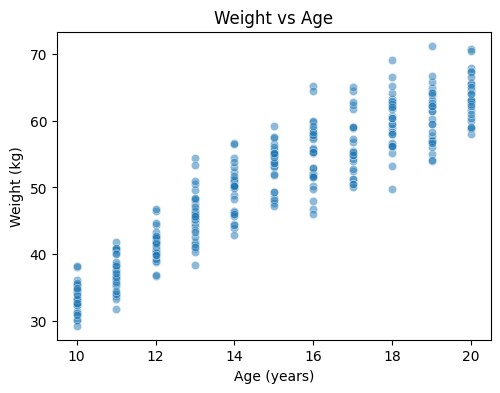

In [47]:
# Scatter plot used to visualize the relationship between age and weight and identify trends
#or patterns in the data
plot_scatterplot(df_train_without_outliers)

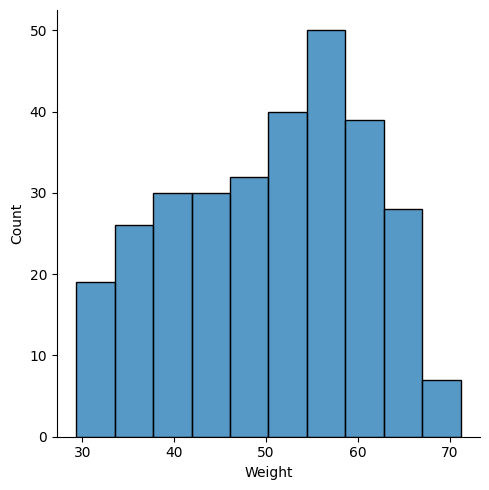

In [48]:
# How the data is distributed
sns.displot(df_train_without_outliers.Weight)

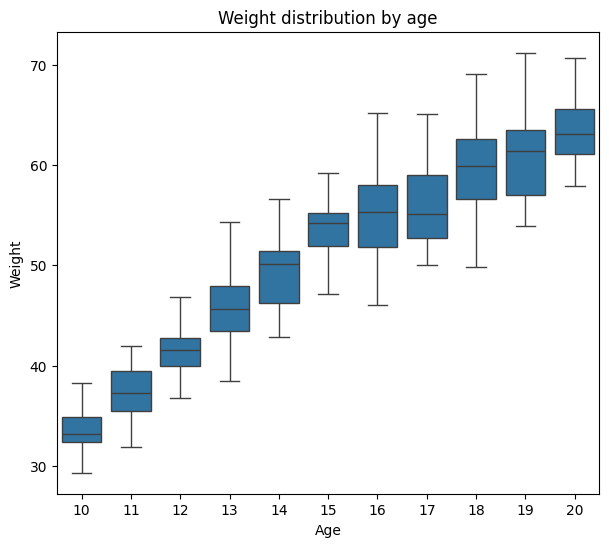

In [49]:
# using the function bax_plot
box_plot(df_train_without_outliers)

In [50]:
print("Before:", len(df_train_model_v2 )) # Display the number of records before removing outliers
print("After:", len(df_train_without_outliers)) # Display the number of records after removing outliers
# Calculate and display the total number of outliers removed
print("Outliers removed:", len(df_train_model_v2 ) - len(df_train_without_outliers))

Before: 308
After: 301
Outliers removed: 7


In [51]:
# Create version 2 of the model
model_v2 = smf.ols(
    'Weight ~ Age',
    data=df_train_without_outliers
).fit()
print(model_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1699.
Date:                Sat, 20 Dec 2025   Prob (F-statistic):          2.32e-125
Time:                        11:14:17   Log-Likelihood:                -839.65
No. Observations:                 301   AIC:                             1683.
Df Residuals:                     299   BIC:                             1691.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9562      1.102      5.407      0.0

In [52]:
# Creates a vector of evenly spaced age values,
# covering the entire range present in the training set
age_vals_model_v2 = np.linspace(
    df_train_model_v2['Age'].min(),
    df_train_model_v2['Age'].max(),
    samples
)

# Generates model predictions for the created age values
predictions_model_v2 = model_v2.get_prediction(
    pd.DataFrame({'Age': age_vals_model_v2})
)

# Extract the mean of the model predictions
pred_mean_v2 = predictions_model_v2.predicted_mean

# Obtain the confidence intervals of the predictions
conf_int_v2 = predictions_model_v2.conf_int()

In [53]:
# create dataset to fill error bar
df_summary_v2 = create_summary(df_train_without_outliers)

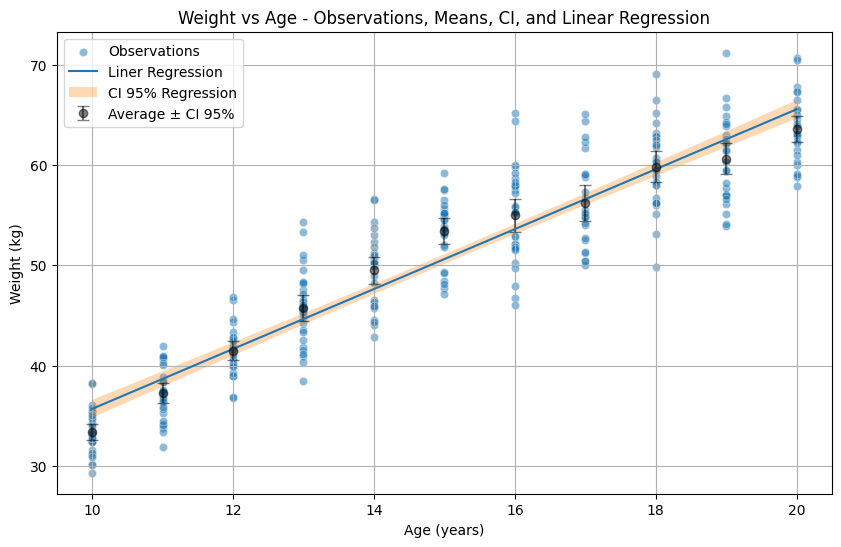

In [54]:
# Create graph with linear regression
create_regression_graph(df_train_without_outliers, df_summary_v2, age_vals_model_v2 )

In [55]:
# Calculates the model residuals ( difference between observerd and predicted values)
# and stores them in a new column in the training set
df_train_without_outliers['residual'] = model_v2.resid

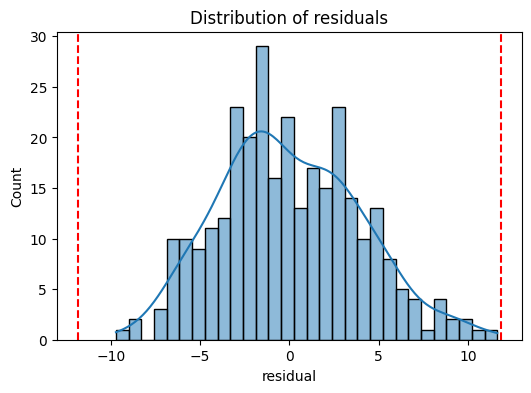

In [56]:
# Display residuals graph
plot_residuo(df_train_without_outliers['residual'] )

In [57]:
# Displays the coefficient of determination (R²) of the model in the training set,
# indicating how much of the data variability is explained by the model.
print('R² (Training): ', round(model_v2.rsquared,2))

R² (Training):  0.85


In [58]:
# Generate model predictions using the test set
predictions_model_v2_test = model_v2.predict(df_test_model_v2)

In [59]:
# Add the model predictions as a new column in the test set
df_test_model_v2['Prediction'] = predictions_model_v2_test

In [60]:
# Display dataframe test
df_test_model_v2.head()

,Age,Weight,Prediction
308,18,55.729467,59.497628
309,19,59.958378,62.472149
310,17,61.185450,56.523107
311,20,59.132568,65.446670
312,20,64.566974,65.446670


In [61]:
# Calculates the RMSE (Root Mean Squared Error)
# Measures the average error of predictions, penalizing large errors more heavily
rmse_v2 = np.sqrt(mean_absolute_error(df_test_model_v2['Weight'], df_test_model_v2['Prediction']))

# Calculates the MAE (Mean Absolute Error)
# Measures the average absolute error between actual and predicted values
mae_v2 = mean_absolute_error(df_test_model_v2['Weight'], df_test_model_v2['Prediction'])

# Calculates R² (Coefficient of Determination)
# Indicates how well the model explains the variability of the actual data
r2_test_v2 = r2_score(df_test_model_v2['Weight'], df_test_model_v2['Prediction'])

In [62]:
# Displays the RMSE of the test set
# The value is rounded to two decimal places for ease of reading
print("RMSE (Test)", round(rmse_v2,2))  

# Displays the MAE of the test set
# Represents the mean absolute error between actual and predicted 
print("MAE (Test)", round(mae_v2,2))    

# Displays the R² of the test set
# Indicates the model's level of explanation of the data variability
print("R² (Test)", round(r2_test_v2,2)) 

RMSE (Test) 1.78
MAE (Test) 3.17
R² (Test) 0.84


### Analysis of results

The results indicate that the model has high explanatory power, statistical robustness, and good generalization capacity, making it suitable for analytical use and decision-making support.

 Model Fit Quality
 
 R² (Training): 0.85
 
 Adjusted R²: 0.85
 
 R² (Test): 0.84

 Interpretation

The model can explain approximately 84% to 86% of the variation in weight based on age.
The proximity between the training and test R² indicates that there is no overfitting, i.e., the model maintains good performance on new data.

 Forecast Accuracy (Test Data)
 
 RMSE: 1.78
 
 MAE: 3.17

 Interpretation
 
 The RMSE indicates that the average error of the forecasts is around 1.78 weight units, penalizing larger errors.
 
 The MAE shows that, on average, the forecasts differ from the actual values by 3.17 units.
 
 These values indicate good practical accuracy, especially considering the simplicity of the model (only one explanatory variable).

 Statistical Significance
 
 p-value < 0.001 for the Age variable
 
 Statistically highly significant
 
 Confidence interval (95%): [2.83; 3.12]
 
 This confirms that age is a factor strongly associated with weight, with a consistent and predictable impact.
